In [41]:
import re
# 9781408845646 -> 978-1-4088-4564-6
isbn13 = "9781408845646"

ISBN13 = re.compile("^[0-9]{13}$")

print(ISBN13.match(isbn13))
isbn13 = "123456789!@#$"
print(ISBN13.match(isbn13))

<re.Match object; span=(0, 13), match='9781408845646'>
None


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from scipy import stats

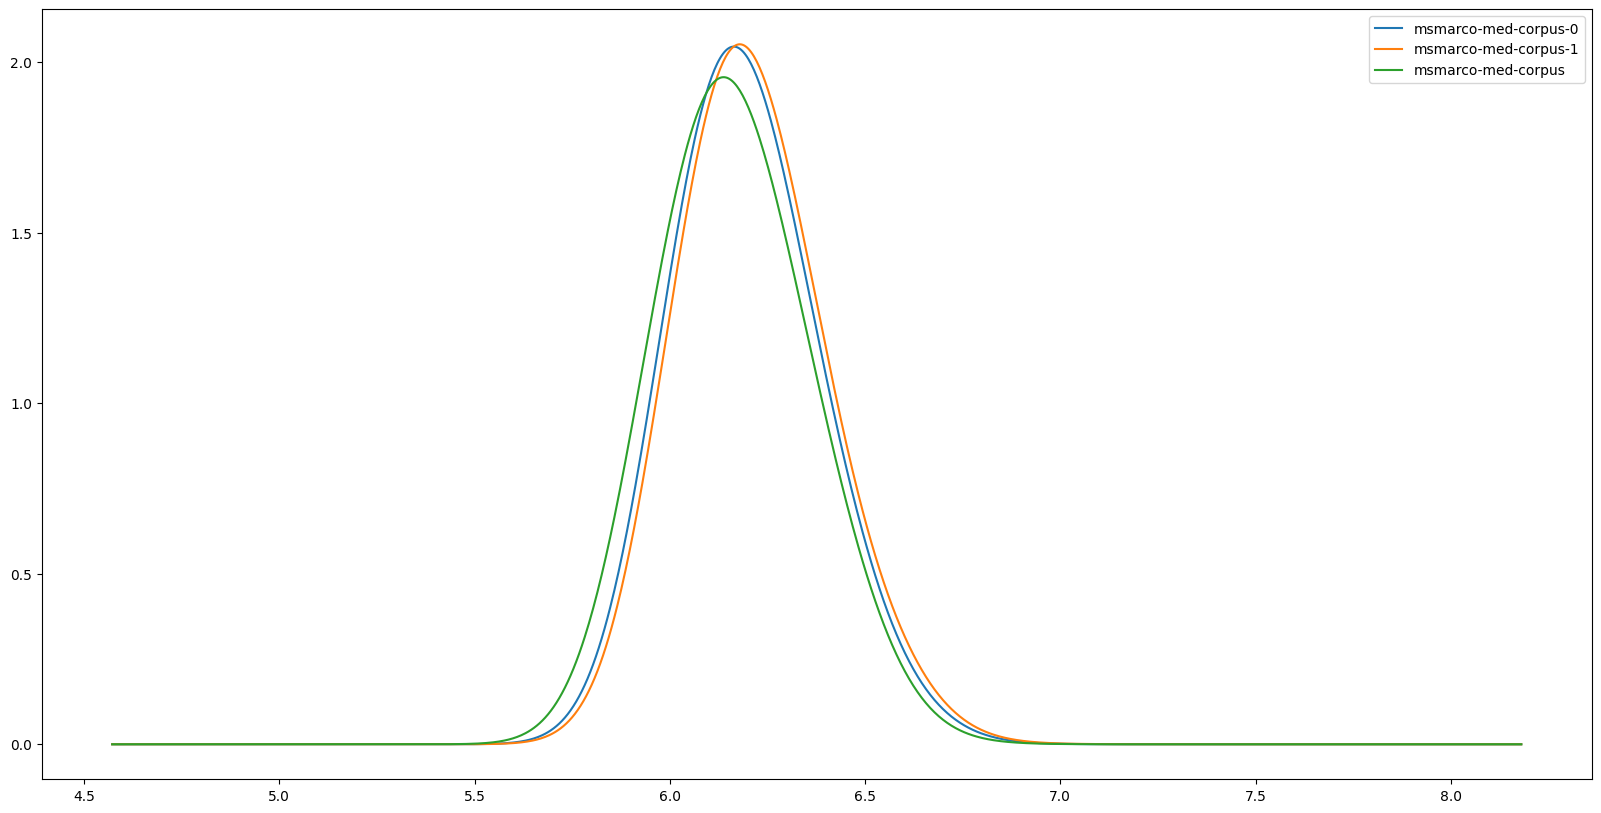

In [25]:
def read_perfs(path, include_qids=False):
    if include_qids:
        qids = []

    with open(path) as reader:
        perfs = []
        for line in reader:
            _, perf = line.split()
            perfs.append(float(perf))
            if include_qids:
                qids.append(_)

    return (perfs, qids) if include_qids else perfs
    
# def corpus_plot(in_data, out_data):
#     in_data_var = []
#     for f in in_data:
#         in_data_var.append((f["desc"], read_perfs(f["path"]), True))

#     out_data_var = []
#     for f in out_data:
#         out_data_var.append((f["desc"], read_perfs(f["path"]), False))

#     start = 0
#     plt.figure(figsize=(20, 10))
#     for desc, perfs, in_domain in in_data_var + out_data_var:
#         perfs.sort()
#         # plt.scatter(np.arange(start, start + len(perfs)), perfs, label=f"{desc} (InDomain={in_domain})")
#         plt.hist(perfs, bins=25, density=True, label=f"{desc} (InDomain={in_domain})", alpha=0.4)
#         start += len(perfs) + 1
#     plt.legend()


def corpus_plot(data, n_bins=25):

    ref_qids = None

    plt.figure(figsize=(20, 10))
    for name, v in data.items():
        perfs, qids = v
        #if ref_qids is None:
        #    ref_qids = qids
        #else:
        #    assert ref_qids == qids

        plt.hist(perfs, bins=n_bins, density=True, label=f"{name}", alpha=0.4)
    plt.legend()


def corpus_plot_kde(data, n_bins=25, draw_bins=False):
    plt.figure(figsize=(20, 10))

    min_, max_ = float("inf"), float("-inf")

    for name, v in data.items():
        perfs, _ = v
        min_ = min(min_, min(perfs))
        max_ = max(max_, max(perfs))
    
    
    for name, v in data.items():
        perfs, qids = v
        kde = stats.gaussian_kde(perfs, 0.5)
        xx = np.linspace(min_ - 1, max_ + 1, 1000)
        plt.plot(xx, kde(xx), label=f"{name}")
    plt.legend()
    
corpus_plot_kde(msmarco_corpus)  

In [4]:



def read_folder(folder):
    corpus_qpp = {}
    query_qpp = {}
    for fname in os.listdir(folder):
        print(fname)
        if "log" in fname:
            continue
        if "corpus" in fname:
            corpus_qpp[fname.split(".")[0]] = read_perfs(os.path.join(folder, fname), include_qids=True)
        else:
            query_qpp[fname.split(".")[0]] = read_perfs(os.path.join(folder, fname), include_qids=True)

    return corpus_qpp, query_qpp


corpus_qpp, query_qpp = read_folder("./qpp/")

dev_scifact.txt
msmarco-perturbed-1.0-validation.txt
msmarco-med-corpus-0.1.txt
bier_cqadupstack-tex-corpus.txt
bier_cqadupstack-gis_test.txt
bier_fiqa-corpus.txt
msmarco-perturbed-0.5-validation.txt
dl19_msmarco-passage.txt
bier_trec-covid-corpus.txt
msmarco-med-corpus-0.5.txt
bier_cqadupstack-english-corpus.txt
bier_cqadupstack-tex_test.txt
bier_cqadupstack-programmers_test.txt
msmarco-med-corpus-1.0.txt
msmarco-perturbed-0.1-train.txt
bier_cqadupstack-programmers-corpus.txt
bier_cqadupstack-gaming_test.txt
bier_cqadupstack-physics_test.txt
bier_cqadupstack-stats_test.txt
bier_cqadupstack-unix-corpus.txt
msmarco-med-corpus.txt
bier_cqadupstack-stats-corpus.txt
bier_cqadupstack-android_test.txt
bier_fiqa_test.txt
bier_cqadupstack-android-corpus.txt
qpp.log
msmarco-dev.txt
bier_trec-covid_test.txt
bier_cqadupstack-english_test.txt
msmarco-perturbed-0.1-validation.txt
corpus_scifact.txt
dl20_msmarco-passage.txt
msmarco-validation.txt
bier_cqadupstack-webmasters-corpus.txt
bier_cqadupsta

In [6]:
stoch_corpus_qpp, stoch_query_qpp = read_folder("./stoch_qpp")

dev_scifact.txt
msmarco-perturbed-1.0-validation.txt
msmarco-med-corpus-0.1.txt
bier_cqadupstack-tex-corpus.txt
bier_cqadupstack-gis_test.txt
bier_fiqa-corpus.txt
msmarco-perturbed-0.5-validation.txt
bier_trec-covid-corpus.txt
msmarco-med-corpus-0.5.txt
bier_cqadupstack-english-corpus.txt
bier_cqadupstack-tex_test.txt
bier_cqadupstack-programmers_test.txt
msmarco-med-corpus-1.0.txt
msmarco-perturbed-0.1-train.txt
bier_cqadupstack-programmers-corpus.txt
bier_cqadupstack-gaming_test.txt
bier_cqadupstack-physics_test.txt
bier_cqadupstack-stats_test.txt
bier_cqadupstack-unix-corpus.txt
msmarco-med-corpus.txt
bier_cqadupstack-stats-corpus.txt
bier_cqadupstack-android_test.txt
bier_fiqa_test.txt
bier_cqadupstack-android-corpus.txt
qpp.log
msmarco-dev.txt
bier_trec-covid_test.txt
bier_cqadupstack-english_test.txt
msmarco-perturbed-0.1-validation.txt
corpus_scifact.txt
msmarco-validation.txt
bier_cqadupstack-webmasters-corpus.txt
bier_cqadupstack-physics-corpus.txt
bier_cqadupstack-webmasters_

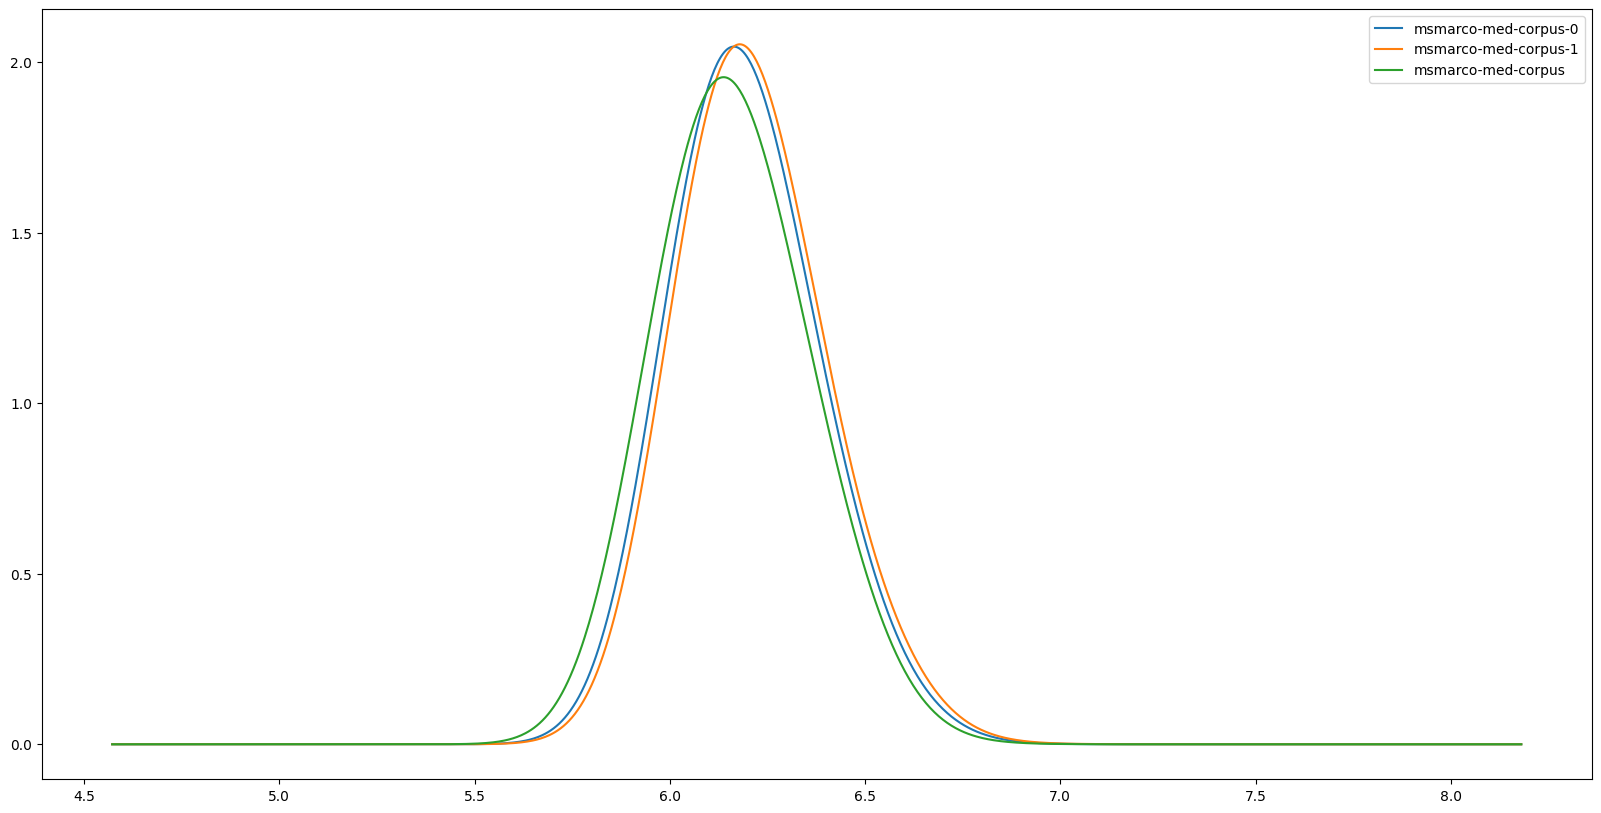

In [28]:
msmarco_corpus = {k:v for (k,v) in corpus_qpp.items() if "msmarco" in k}
corpus_plot_kde(msmarco_corpus)

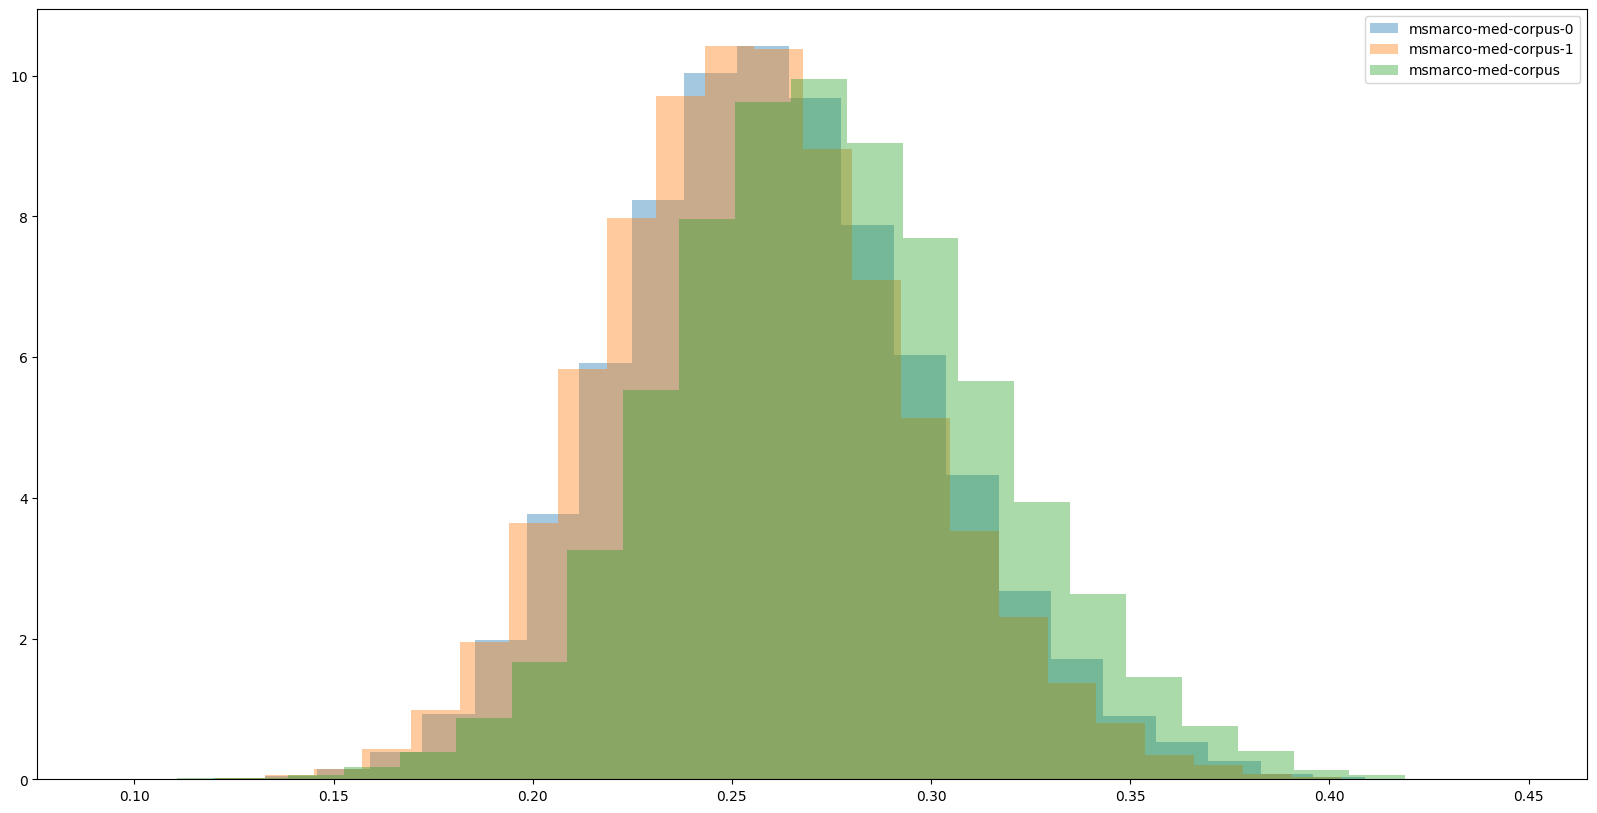

In [13]:
corpus_plot({k:v for (k,v) in stoch_corpus_qpp.items() if "msmarco" in k})

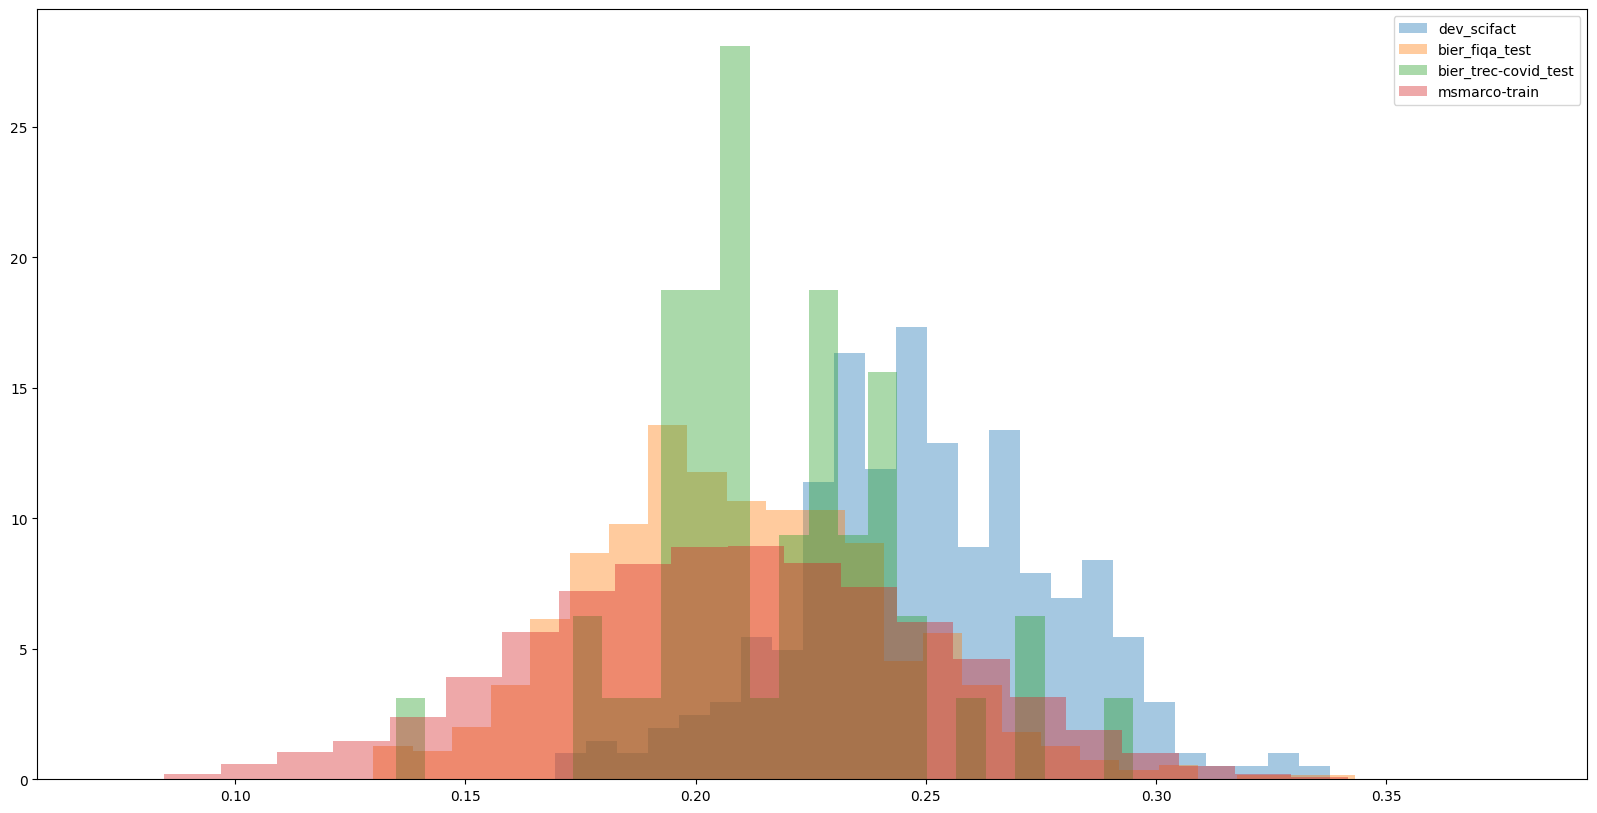

In [27]:
KEYS = {"dev_scifact", "msmarco-train", "bier_fiqa_test", "bier_trec-covid_test"}
corpus_plot({k:v for (k,v) in stoch_query_qpp.items() if k in KEYS})

In [20]:
query_qpp.keys()

dict_keys(['dev_scifac', 'msmarco-perturbed-1.0-validation', 'bier_cqadupstack-gis_tes', 'msmarco-perturbed-0.5-validation', 'dl19_msmarco-passage', 'bier_cqadupstack-tex_tes', 'bier_cqadupstack-programmers_tes', 'msmarco-perturbed-0.1-train', 'bier_cqadupstack-gaming_tes', 'bier_cqadupstack-physics_tes', 'bier_cqadupstack-stats_tes', 'bier_cqadupstack-android_tes', 'bier_fiqa_tes', 'msmarco-dev', 'bier_trec-covid_tes', 'bier_cqadupstack-english_tes', 'msmarco-perturbed-0.1-validation', 'dl20_msmarco-passage', 'msmarco-validation', 'bier_cqadupstack-webmasters_tes', 'msmarco-perturbed-1.0-train', 'bier_cqadupstack-wordpress_tes', 'msmarco-dl20', 'msmarco-train', 'msmarco-dl19', 'msmarco-perturbed-0.5-train', 'bier_cqadupstack-unix_tes'])

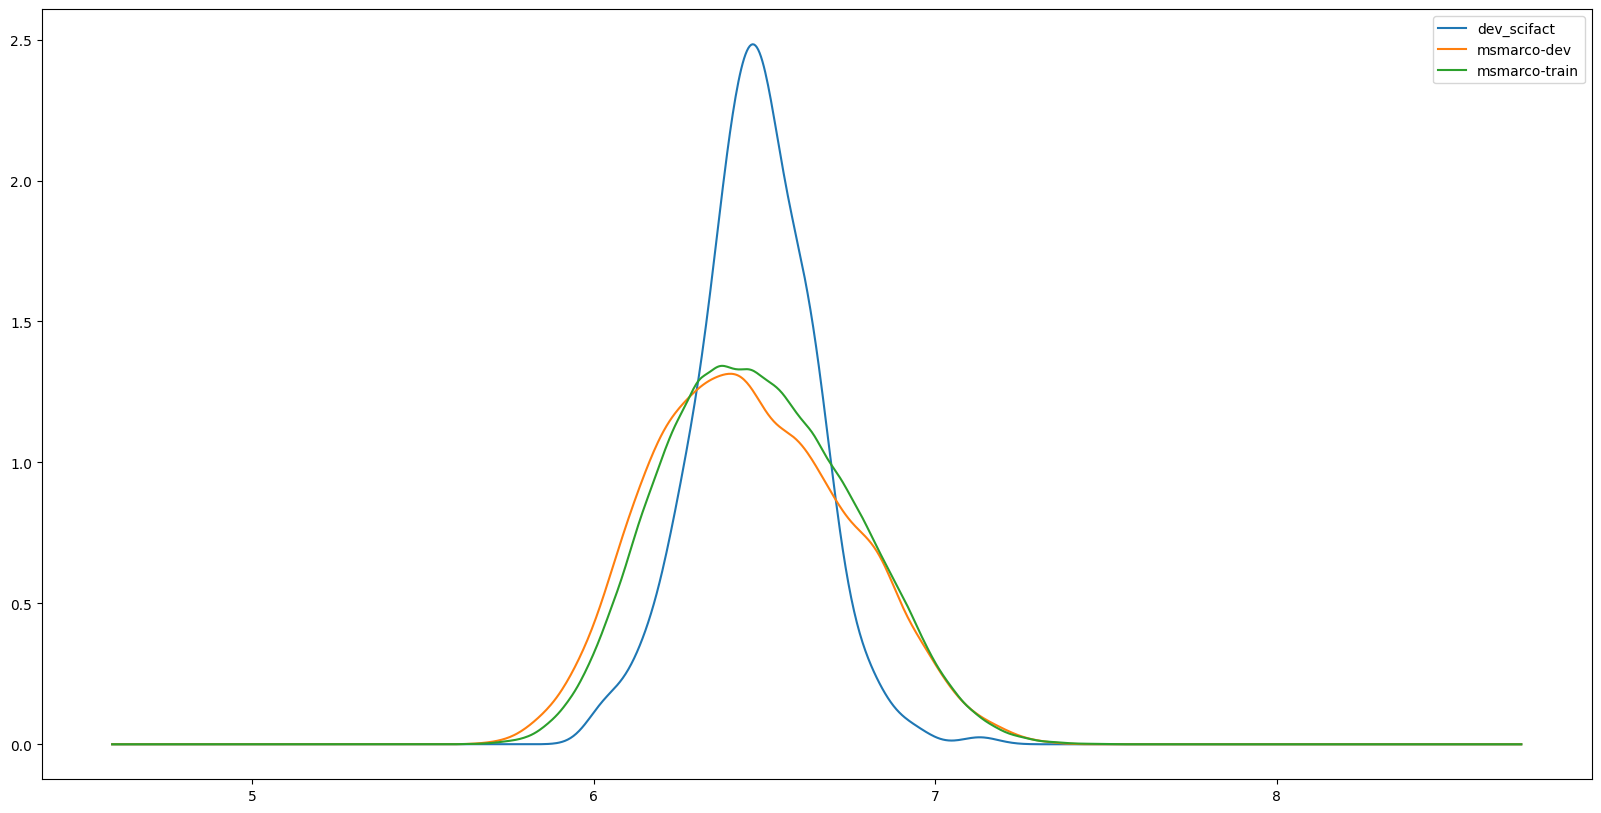

In [20]:
KEYS = {"dev_scifact", "msmarco-dev", "msmarco-train"}
corpus_plot_kde({k:v for (k,v) in query_qpp.items() if k in KEYS})

In [ ]:
KEYS = {"dev_scifact", "msmarco-dev", "msmarco-train"}
corpus_plot({k:v for (k,v) in query_qpp.items() if k in KEYS})